In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
crime = pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Data Preprocessing and EDA

In [4]:
crime = crime.rename({'Unnamed: 0':'State'}, axis = 1)

In [5]:
print(crime.head())

        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [6]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

In [9]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


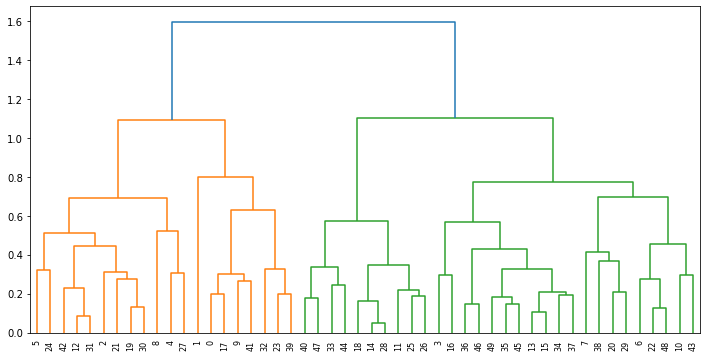

In [10]:
#certe a dendrogream
#Plotting the dendrogram - eard method
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [11]:
#Fit and Predict
#specifying hierarchical clustering, clusters as 3(we are concidering n of cluster =3)
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=3)

In [12]:
#prediction - there is no centroid in agglomerative options
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [13]:
#3 clusters are formed.
#creating new dataframe column as clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
crime['Hierarchical_clusterid'] = Clusters

In [14]:
crime

,State,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [15]:
crime.groupby('Hierarchical_clusterid').agg(['mean']).reset_index()

,Hierarchical_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.165000,255.250000,68.400000,29.165000
1,1,6.055556,140.055556,71.333333,18.683333
2,2,3.091667,76.000000,52.083333,11.833333


In [16]:
crime['Hierarchical_clusterid'].value_counts()

0    20
1    18
2    12
Name: Hierarchical_clusterid, dtype: int64

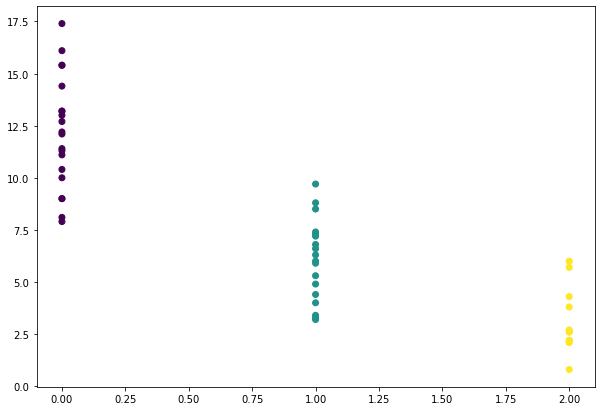

In [17]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['Hierarchical_clusterid'],crime['Murder'], c=hc.labels_) 

# K MEANS

In [18]:
# Normalization function 

scaler = StandardScaler()
scaled_crime = scaler.fit_transform(crime.iloc[:,1:])

In [19]:
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

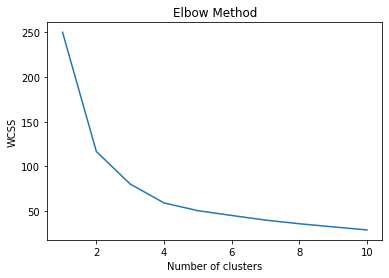

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
#Build Cluster algorithm

clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime)

KMeans(n_clusters=4, random_state=42)

In [22]:
clusters_new.labels_

array([1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 0, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [23]:
crime['clusterid_new'] = clusters_new.labels_
crime

,State,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,2
9,Georgia,17.4,211,60,25.8,0,1


In [24]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.40179755, -0.37217475,  0.40430025, -0.27487043,  0.20412415],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 , -1.07165176],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383, -1.07165176],
       [-1.08919812, -1.14860501, -0.93910247, -1.01363413,  1.47990005]])

In [25]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid
,,mean,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333,1.0
1,1,14.671429,251.285714,54.285714,21.685714,0.0
2,2,10.815385,257.384615,76.000000,33.192308,0.0
3,3,3.091667,76.000000,52.083333,11.833333,2.0


In [26]:
crime

,State,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,2
9,Georgia,17.4,211,60,25.8,0,1


In [27]:
crime[crime['clusterid_new']==0]

,State,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid,clusterid_new
3,Arkansas,8.8,190,50,19.5,1,0
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
10,Hawaii,5.3,46,83,20.2,1,0
13,Indiana,7.2,113,65,21.0,1,0
15,Kansas,6.0,115,66,18.0,1,0
16,Kentucky,9.7,109,52,16.3,1,0
20,Massachusetts,4.4,149,85,16.3,1,0
29,New Jersey,7.4,159,89,18.8,1,0
34,Ohio,7.3,120,75,21.4,1,0


In [28]:
crime[crime['clusterid_new']==1]

,State,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,1
9,Georgia,17.4,211,60,25.8,0,1
17,Louisiana,15.4,249,66,22.2,0,1
23,Mississippi,16.1,259,44,17.1,0,1
32,North Carolina,13.0,337,45,16.1,0,1
39,South Carolina,14.4,279,48,22.5,0,1
41,Tennessee,13.2,188,59,26.9,0,1


In [29]:
crime[crime['clusterid_new']==2]

,State,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid,clusterid_new
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
8,Florida,15.4,335,80,31.9,0,2
12,Illinois,10.4,249,83,24.0,0,2
19,Maryland,11.3,300,67,27.8,0,2
21,Michigan,12.1,255,74,35.1,0,2
24,Missouri,9.0,178,70,28.2,0,2
27,Nevada,12.2,252,81,46.0,0,2


In [30]:
crime[crime['clusterid_new']==3]

,State,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid,clusterid_new
11,Idaho,2.6,120,54,14.2,2,3
14,Iowa,2.2,56,57,11.3,2,3
18,Maine,2.1,83,51,7.8,2,3
22,Minnesota,2.7,72,66,14.9,2,3
25,Montana,6.0,109,53,16.4,2,3
26,Nebraska,4.3,102,62,16.5,2,3
28,New Hampshire,2.1,57,56,9.5,2,3
33,North Dakota,0.8,45,44,7.3,2,3
40,South Dakota,3.8,86,45,12.8,2,3
44,Vermont,2.2,48,32,11.2,2,3


# DBSCAN

In [31]:
print(crime.head())

        State  Murder  Assault  UrbanPop  Rape  Hierarchical_clusterid  \
0     Alabama    13.2      236        58  21.2                       0   
1      Alaska    10.0      263        48  44.5                       0   
2     Arizona     8.1      294        80  31.0                       0   
3    Arkansas     8.8      190        50  19.5                       1   
4  California     9.0      276        91  40.6                       0   

   clusterid_new  
0              1  
1              2  
2              2  
3              0  
4              2  


In [32]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   50 non-null     object 
 1   Murder                  50 non-null     float64
 2   Assault                 50 non-null     int64  
 3   UrbanPop                50 non-null     int64  
 4   Rape                    50 non-null     float64
 5   Hierarchical_clusterid  50 non-null     int64  
 6   clusterid_new           50 non-null     int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 2.7+ KB


In [33]:
crime.head(10)

,State,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,2
9,Georgia,17.4,211,60,25.8,0,1


In [41]:
array=df_norm.values
array

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [42]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [51]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=4)

In [52]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [56]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl.head()

,cluster
0,0
1,-1
2,-1
3,-1
4,-1


In [61]:
df_norm = pd.concat([crime,cl],axis=1)
df_norm.head()

,State,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid,clusterid_new,cluster
0,Alabama,13.2,236,58,21.2,0,1,0
1,Alaska,10.0,263,48,44.5,0,2,-1
2,Arizona,8.1,294,80,31.0,0,2,-1
3,Arkansas,8.8,190,50,19.5,1,0,-1
4,California,9.0,276,91,40.6,0,2,-1


In [62]:
df_norm.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid,clusterid_new
,,mean,mean,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667,0.166667,1.500000
1,0,14.050000,238.000000,57.750000,23.200000,0.000000,1.000000
2,1,4.825000,112.035714,63.357143,16.107143,1.392857,1.357143


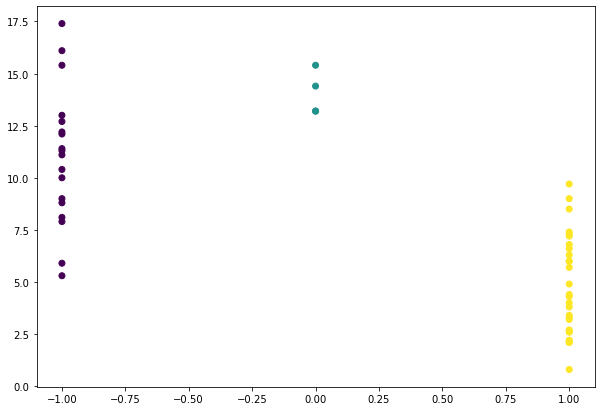

In [63]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df_norm['cluster'],df_norm['Murder'], c=dbscan.labels_) 